# Project 4 - CLUSTERING
UID: 404749568 , 904729596 , 704774938

In [48]:
import re
import math
import string
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt; plt.rcdefaults()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction import text
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from statsmodels.discrete.discrete_model import Logit
from nltk import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from scipy.sparse import linalg
from sklearn.decomposition import NMF
from mpl_toolkits.mplot3d import Axes3D

## Question 1

In [6]:
#training data
remove = ('headers', 'footers', 'quotes')
final_catagories = [ 'comp.graphics', 'comp.sys.mac.hardware','comp.os.ms-windows.misc',
                    'comp.sys.ibm.pc.hardware','rec.autos','rec.motorcycles','rec.sport.baseball','rec.sport.hockey']
twenty_train = fetch_20newsgroups(subset = 'all', categories=final_catagories, shuffle=True,
                                  random_state=42)

bclasses = ['Computer technology', 'Recreational activity']
new_target = (twenty_train.target[:]>=4)*1

In [10]:
def stemming_tokenizer(text):
    stemmer = SnowballStemmer("english")
    interim = text 
    interim = "".join([a for a in interim if a not in set (string.punctuation)])
    interim = re.sub('[,.-:/()?{}*$#&]',' ',interim)
    interim = "".join(b for b in interim if ord(b) < 128)
    words = interim.split()
    stemmed = [stemmer.stem(item) for item in words]
    return stemmed
final_vect = CountVectorizer(analyzer = 'word' , tokenizer = stemming_tokenizer,stop_words = 'english',min_df = 2,max_df=0.8)
final_counts = final_vect.fit_transform(twenty_train.data)
print("Dimensions of Numerical feature vector: "+ str(final_counts.shape))
print ("Number of terms Extracted: " + str(final_counts.shape[1]))

#TFIDF
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(final_counts)
print("Dimensions of TF-IDF vector: "+ str(X_train_tfidf.shape))

Dimensions of Numerical feature vector: (7882, 30296)
Number of terms Extracted: 30296
Dimensions of TF-IDF vector: (7882, 30296)


## Question 2

In [14]:
km1 = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0)
km1.fit(X_train_tfidf)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km1.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km1.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km1.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km1.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km1.labels_))
print(confusion_matrix(new_target, km1.labels_))
new_target_2 = (twenty_train.target[:]<4)*1
print(confusion_matrix(new_target_2, km1.labels_))

Homogeneity: 0.246
Completeness: 0.329
V-measure: 0.281
Adjusted Rand-Index: 0.172
Adjusted Mutual-Index: 0.246
[[3899    4]
 [2304 1675]]
[[2304 1675]
 [3899    4]]


## Question 3

In [17]:
U, s, V = linalg.svds(X_train_tfidf,k=500)
print(s)

[  1.85376542   1.85390293   1.8560895    1.85627918   1.85765439
   1.85833109   1.86037026   1.86068271   1.86131489   1.86418741
   1.86594188   1.86637139   1.86788493   1.86898286   1.87049499
   1.87292509   1.87430296   1.8754286    1.87630267   1.87685839
   1.87858993   1.88059558   1.88177281   1.88295321   1.88353657
   1.88546557   1.88692775   1.88825062   1.8883635    1.88925943
   1.89085784   1.89312172   1.89361373   1.8944378    1.89673446
   1.89755468   1.89860947   1.89976541   1.90190362   1.90233934
   1.90281445   1.90393505   1.90540254   1.90746436   1.90994463
   1.91067322   1.91073834   1.91233093   1.91338942   1.91547701
   1.91663181   1.91831069   1.91977402   1.92051461   1.921106
   1.92284377   1.92446077   1.92645204   1.92713946   1.92883115
   1.92980894   1.9316983    1.932295     1.93401368   1.93587356
   1.93669541   1.93801448   1.9396299    1.94088323   1.94287288
   1.9437488    1.94488635   1.94580319   1.94724212   1.94840142
   1.9492722

In [19]:
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, verbose=0)
for i in range (1,6):
    svd = TruncatedSVD(n_components=i, random_state=42)
    transformed_tfidf = svd.fit_transform(X_train_tfidf)
    print("Number of components: %d" %i)
    print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
    km.fit(transformed_tfidf)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
    print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
    #print(confusion_matrix(new_target, km.labels_))
    #new_target_2 = (twenty_train.target[:]<4)*1
    #print(confusion_matrix(new_target_2, km.labels_))
    print("=================================================")


Number of components: 1
Dimensions of TF-IDF vector after LSI: (7882, 1)
Homogeneity: 0.018
Completeness: 0.019
V-measure: 0.018
Adjusted Rand-Index: 0.023
Adjusted Mutual-Index: 0.018
Number of components: 2
Dimensions of TF-IDF vector after LSI: (7882, 2)
Homogeneity: 0.633
Completeness: 0.633
V-measure: 0.633
Adjusted Rand-Index: 0.738
Adjusted Mutual-Index: 0.633
Number of components: 3
Dimensions of TF-IDF vector after LSI: (7882, 3)
Homogeneity: 0.658
Completeness: 0.658
V-measure: 0.658
Adjusted Rand-Index: 0.761
Adjusted Mutual-Index: 0.658
Number of components: 4
Dimensions of TF-IDF vector after LSI: (7882, 4)
Homogeneity: 0.232
Completeness: 0.319
V-measure: 0.269
Adjusted Rand-Index: 0.156
Adjusted Mutual-Index: 0.232
Number of components: 5
Dimensions of TF-IDF vector after LSI: (7882, 5)
Homogeneity: 0.233
Completeness: 0.320
V-measure: 0.270
Adjusted Rand-Index: 0.156
Adjusted Mutual-Index: 0.233


In [20]:
#best values for SVD n_components = 2
svd = TruncatedSVD(n_components=2, random_state=42)
transformed_tfidf = svd.fit_transform(X_train_tfidf)
print("Number of components: 2")
#print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
km.fit(transformed_tfidf)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
print(confusion_matrix(new_target, km.labels_))
new_target_2 = (twenty_train.target[:]<4)*1
print(confusion_matrix(new_target_2, km.labels_))

Number of components: 2
Homogeneity: 0.632
Completeness: 0.632
V-measure: 0.632
Adjusted Rand-Index: 0.737
Adjusted Mutual-Index: 0.632
[[3663  240]
 [ 317 3662]]
[[ 317 3662]
 [3663  240]]


In [21]:
#best values for SVD n_components = 3
svd = TruncatedSVD(n_components=3, random_state=42)
transformed_tfidf = svd.fit_transform(X_train_tfidf)
print("Number of components: 3")
#print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
km.fit(transformed_tfidf)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(new_target, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
print(confusion_matrix(new_target, km.labels_))
new_target_2 = (twenty_train.target[:]<4)*1
print(confusion_matrix(new_target_2, km.labels_))

Number of components: 3
Homogeneity: 0.658
Completeness: 0.658
V-measure: 0.658
Adjusted Rand-Index: 0.761
Adjusted Mutual-Index: 0.658
[[3678  225]
 [ 278 3701]]
[[ 278 3701]
 [3678  225]]


In [24]:
for i in range (1,6):
    model = NMF(n_components=i, init='random', random_state=0)
    nmf_mat= model.fit_transform(X_train_tfidf) 
    print(X_train_tfidf.shape)
    print(nmf_mat.shape)
    km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
    km.fit(nmf_mat)
    print("number of components: %d" %i)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
    print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
    print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
    print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(new_target, km.labels_))
    print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
    #print(confusion_matrix(new_target, km.labels_))
    #new_target_2 = (twenty_train.target[:]<4)*1
    #print(confusion_matrix(new_target_2, km.labels_))
    print("=================================================")

(7882, 30296)
(7882, 1)
number of components: 1
Homogeneity: 0.018
Completeness: 0.019
V-measure: 0.018
Adjusted Rand-Index: 0.023
Adjusted Mutual-Index: 0.018
(7882, 30296)
(7882, 2)
number of components: 2
Homogeneity: 0.368
Completeness: 0.416
V-measure: 0.390
Adjusted Rand-Index: 0.341
Adjusted Mutual-Index: 0.368
(7882, 30296)
(7882, 3)
number of components: 3
Homogeneity: 0.042
Completeness: 0.157
V-measure: 0.066
Adjusted Rand-Index: 0.009
Adjusted Mutual-Index: 0.041
(7882, 30296)
(7882, 4)
number of components: 4
Homogeneity: 0.217
Completeness: 0.270
V-measure: 0.241
Adjusted Rand-Index: 0.185
Adjusted Mutual-Index: 0.217
(7882, 30296)
(7882, 5)
number of components: 5
Homogeneity: 0.233
Completeness: 0.319
V-measure: 0.269
Adjusted Rand-Index: 0.158
Adjusted Mutual-Index: 0.233


In [25]:
#best value for NMF n_components = 2
model = NMF(n_components=2, init='random', random_state=0)
nmf_mat= model.fit_transform(X_train_tfidf) 
print(X_train_tfidf.shape)
print(nmf_mat.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(nmf_mat)
print("number of components: 2")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(new_target, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
print(confusion_matrix(new_target, km.labels_))
new_target_2 = (twenty_train.target[:]<4)*1
print(confusion_matrix(new_target_2, km.labels_))
#print("=================================================")

(7882, 30296)
(7882, 2)
number of components: 2
Homogeneity: 0.371
Completeness: 0.418
V-measure: 0.393
Adjusted Rand-Index: 0.346
Adjusted Mutual-Index: 0.371
[[  22 3881]
 [2378 1601]]
[[2378 1601]
 [  22 3881]]


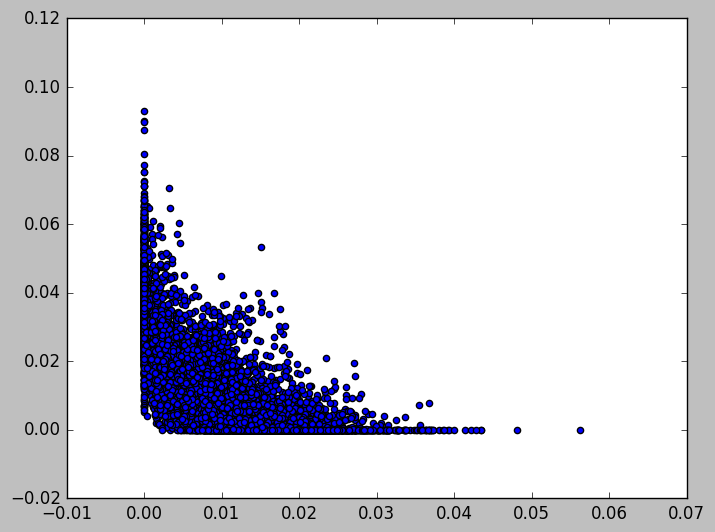

In [29]:
#Plot graph NMF to the data matrix with ambient parameter 2
plt.clf()
plt.scatter(nmf_mat[:,0],nmf_mat[:,1] )
plt.show()

In [45]:
# taking log of NMF mat values
log_nmf_mat = np.log(0.01+nmf_mat)
print(log_nmf_mat.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(log_nmf_mat)
print("number of components: 2")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(new_target, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(new_target, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(new_target, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(new_target, km.labels_))
print("Adjusted Mutual-Index: %.3f"% metrics.adjusted_mutual_info_score(new_target, km.labels_))
print(confusion_matrix(new_target, km.labels_))
new_target_2 = (twenty_train.target[:]<4)*1
print(confusion_matrix(new_target_2, km.labels_))

(7882, 2)
number of components: 2
Homogeneity: 0.627
Completeness: 0.628
V-measure: 0.628
Adjusted Rand-Index: 0.731
Adjusted Mutual-Index: 0.627
[[ 214 3689]
 [3621  358]]
[[3621  358]
 [ 214 3689]]


## Question 4

In [42]:
def draw_plot2 (data, kmeans):
    for i in range(data.shape[0]):
        if (new_target[i] == 0):
            color = 'g'
        else:
            color = 'b'
        plt.scatter(data[i, 0], data[i, 1], color=color)

    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=100,
                color='r')
    plt.show()


In [60]:
def draw_decision(data,kmeans,scaling_factor):
    # Step size of the mesh. Decrease to increase the quality of the VQ.
    h = .001     # point in the mesh [x_min, x_max]x[y_min, y_max].

    # Plot the decision boundary. For that, we will assign a color to each
    x_min, x_max = data[:, 0].min() - scaling_factor, data[:, 0].max() + scaling_factor
    y_min, y_max = data[:, 1].min() - scaling_factor, data[:, 1].max() + scaling_factor
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Obtain labels for each point in mesh. Use last trained model.
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(data[:, 0], data[:, 1], 'k.', markersize=1)
    # Plot the centroids as a white X
    centroids = kmeans.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

Number of components: 2


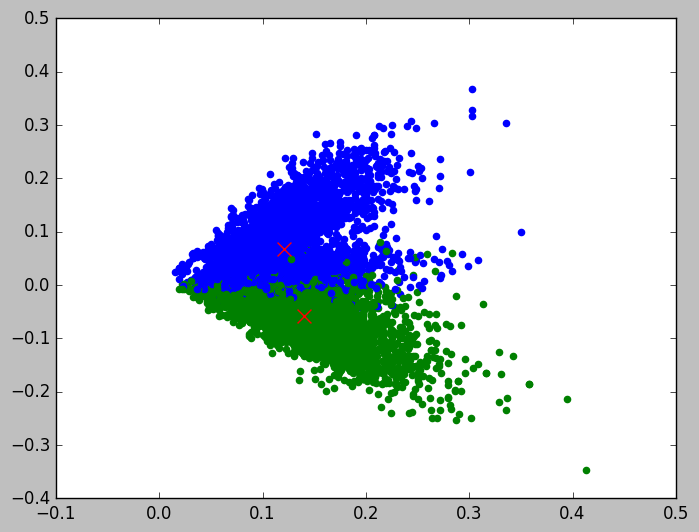

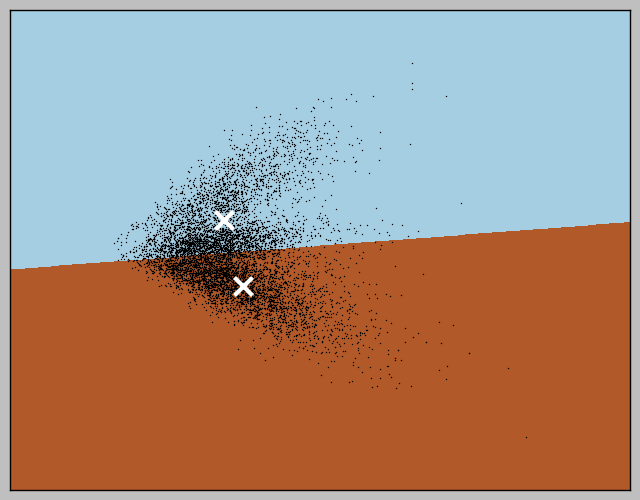

In [61]:
#best values for SVD n_components = 2
svd = TruncatedSVD(n_components=2, random_state=42)
transformed_tfidf = svd.fit_transform(X_train_tfidf)
print("Number of components: 2")
#print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
km.fit(transformed_tfidf)
draw_plot2 (transformed_tfidf,km)
draw_decision (transformed_tfidf,km,0.1)

K:3


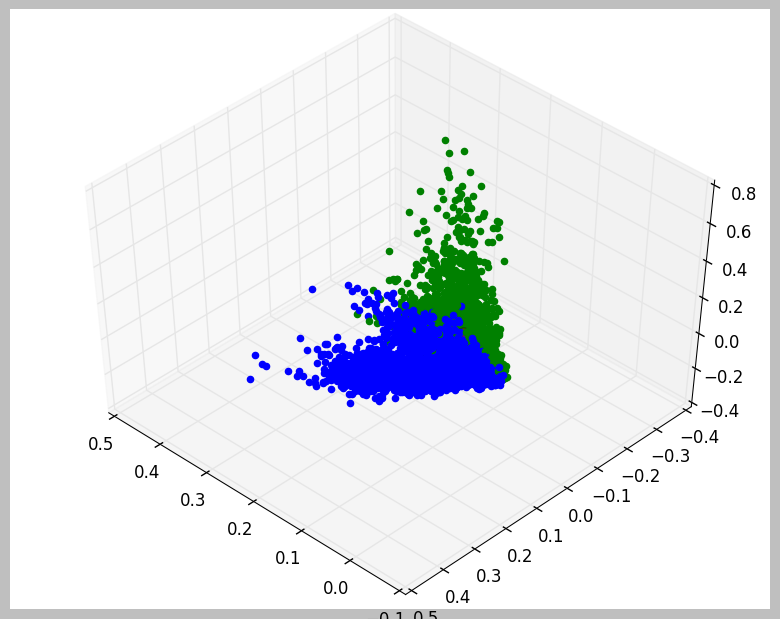

In [53]:
svd = TruncatedSVD(n_components=3, random_state=42)
transformed_tfidf = svd.fit_transform(X_train_tfidf)
print("K:3" )
#print("Dimensions of TF-IDF vector after LSI: "+ str(transformed_tfidf.shape))
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(transformed_tfidf)
fig = plt.figure()
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
for i in range(transformed_tfidf.shape[0]):
    if (new_target[i] == 0):
        color = 'g'
    else:
        color = 'b'
    ax.scatter(transformed_tfidf[i, 0], transformed_tfidf[i, 1],transformed_tfidf[i,2], color=color)
centroids = km.cluster_centers_
ax.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2], s=100,c='r')
plt.show()

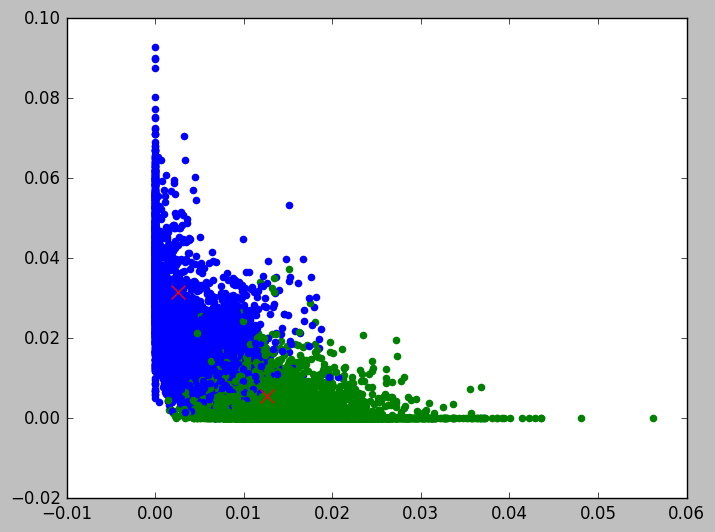

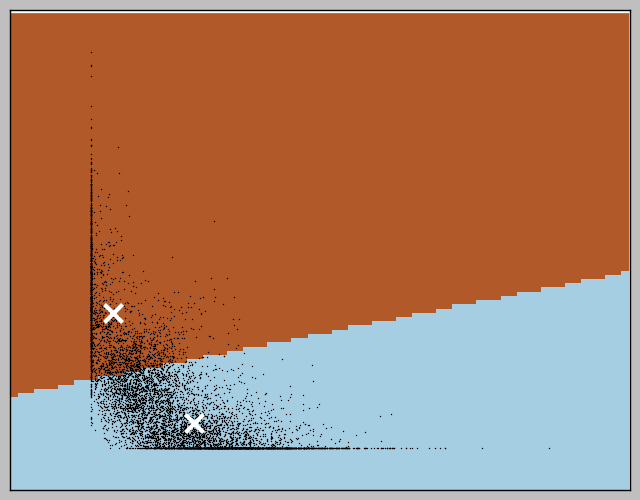

In [62]:
model = NMF(n_components=2, init='random', random_state=0)
nmf_mat= model.fit_transform(X_train_tfidf)
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(nmf_mat)
draw_plot2(data=nmf_mat,kmeans=km)
draw_decision (data=nmf_mat,kmeans=km,scaling_factor=0.01)

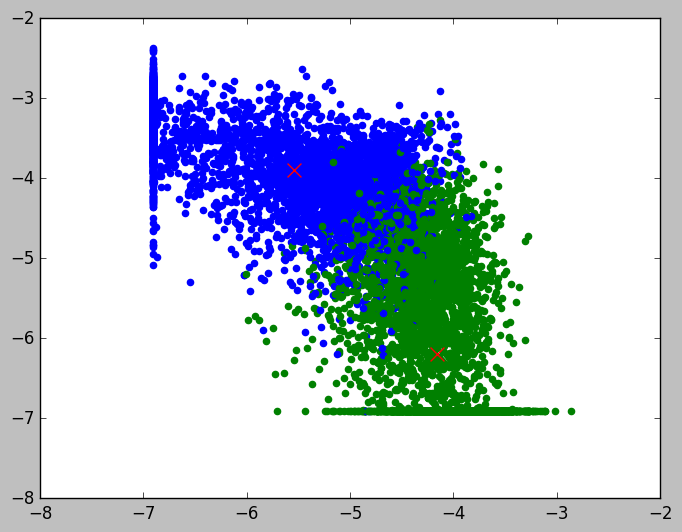

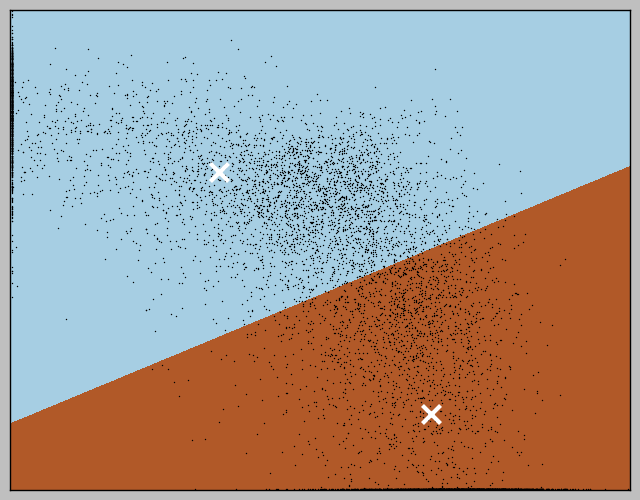

In [64]:
log_nmf_mat = np.log(0.001+nmf_mat)
#print(log_nmf_mat.shape)
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
km.fit(log_nmf_mat)
draw_plot2(data=log_nmf_mat,kmeans=km)
draw_decision(data=log_nmf_mat,kmeans=km,scaling_factor=0.01)